In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from sklearn.manifold import TSNE
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.utils

torch.set_printoptions(edgeitems=1)
%matplotlib inline

In [2]:
# Data has 100 samples per class
filepath = '/Users/urgupta/Documents/deepak/multimnist/MultiDigitMNIST/dataset_100/double_mnist/train'

# apply transformation on each image
data_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

# data transforming
dmnist_data = torchvision.datasets.ImageFolder(root=filepath,
                           transform = data_transform)

# entire data loading
# dmnist_dataloader = DataLoader(dmnist_data, batch_size=len(dmnist_data))
dmnist_dataloader = DataLoader(dmnist_data, batch_size=len(dmnist_data),shuffle=True)

In [93]:
#handlers
type(next(iter(dmnist_dataloader)))

list

feature batch shape: torch.Size([10000, 1, 64, 64])
label batch shape: torch.Size([10000])
torch.Size([64, 64])


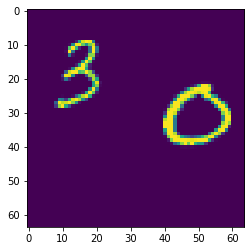

label: 30


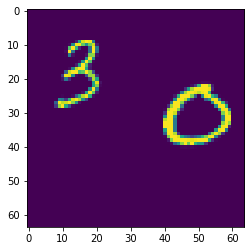

tensor(30)


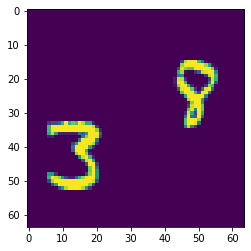

tensor(38)


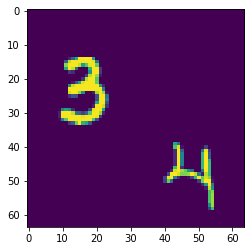

tensor(34)


In [3]:
# iterating and visualizing the dataset (showing 0th image, and then [0:3] images in dataloader)
# (dmnist_data[0][0].shape, image in dataloader) returns torch.size([1,64,64])
images, labels = next(iter(dmnist_dataloader))
print(f'feature batch shape: {images.size()}')
print(f"label batch shape: {labels.size()}")

#showing just one image
img = images[0].squeeze()
print(img.shape)
label = labels[0]
plt.imshow(img)
plt.show()
print(f'label: {label}')

for i in range(3):
    img = images[i].squeeze()
    plt.imshow(img)
    plt.show()
    print(labels[i])

In [4]:
# converting entire data to numpy
X_train = images.numpy()
y_train = labels.numpy()

print('X_train metadata ', X_train.shape, type(X_train))
print(f'y_train metadata {y_train.shape}, {type(y_train)}')

X_train metadata  (10000, 1, 64, 64) <class 'numpy.ndarray'>
y_train metadata (10000,), <class 'numpy.ndarray'>


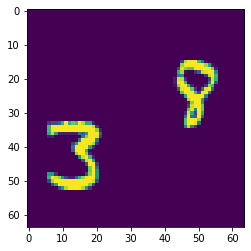

In [9]:
# print(y_train) [30 38 34]
# this is fixed: 
plt.imshow(X_train[1][0])
plt.show()

#it worked well till now images has correct labels

In [140]:
# images, labels = iter(dmnist_dataloader).next()
# dX_train = dimages.numpy()
# dy_train = dlabels.numpy()
#sklearn tsne
dtsne = TSNE(n_iter=1000,perplexity=45).fit_transform(X_train.reshape(10000,-1))

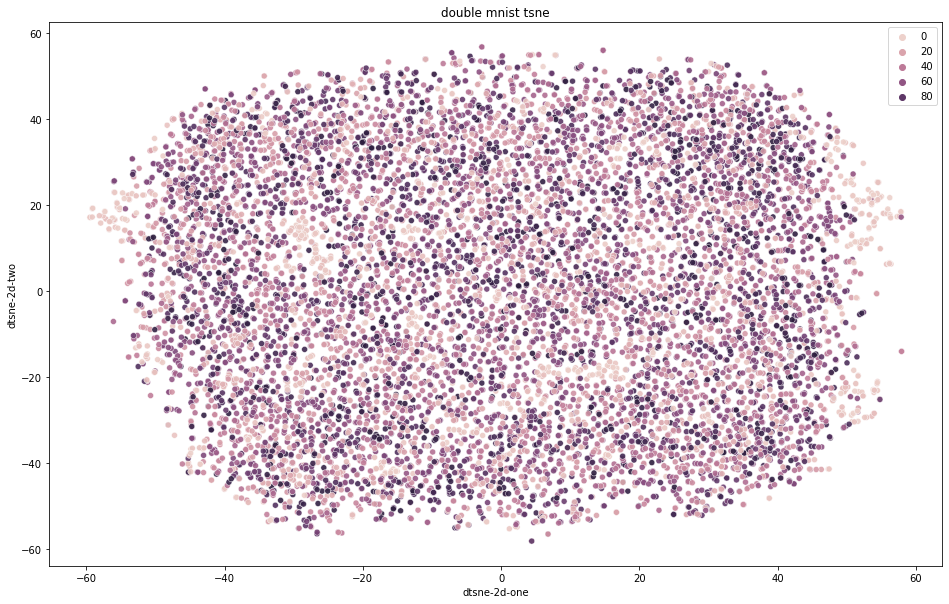

In [145]:
# fig = plt.figure( figsize=(13,13) )

df_subset = pd.DataFrame(0, index=np.arange(len(dmnist_data)),columns=['dtsne-2d-one','dtsne-2d-two'])
# d = pd.DataFrame(0, index=np.arange(len(data)), columns=feature_list)

df_subset['dtsne-2d-one'] = dtsne[:,0]
df_subset['dtsne-2d-two'] = dtsne[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="dtsne-2d-one", y="dtsne-2d-two",
    hue=y_train,
#     cmap=plt.cm.get_cmap('Paired'),    
    data=df_subset,
#     legend="full",
    alpha=0.9
)
plt.title('double mnist tsne')
plt.savefig("dmnist_45.png",bbox_inches='tight', dpi=150)

In [ ]:



for i in range(5,50,2):
    tsne = TSNE(perplexity = i).fit_transform(X_train.reshape(10000,-1))
    
    df_subset = pd.DataFrame(0, index=np.arange(len(dmnist_data)),columns=['dtsne-2d-one','dtsne-2d-two'])

    df_subset['dtsne-2d-one'] = tsne[:,0]
    df_subset['dtsne-2d-two'] = tsne[:,1]

    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="dtsne-2d-one", y="dtsne-2d-two",
        hue=y_train,
        data=df_subset,
        alpha=0.9
        )
    plt.title('double mnist perplexity= %i tsne' %i)
    plt.savefig(f"double_mnist_{i}.png",bbox_inches='tight', dpi=150)
    

<AxesSubplot:xlabel='Mtsne-2d-one', ylabel='Mtsne-2d-two'>

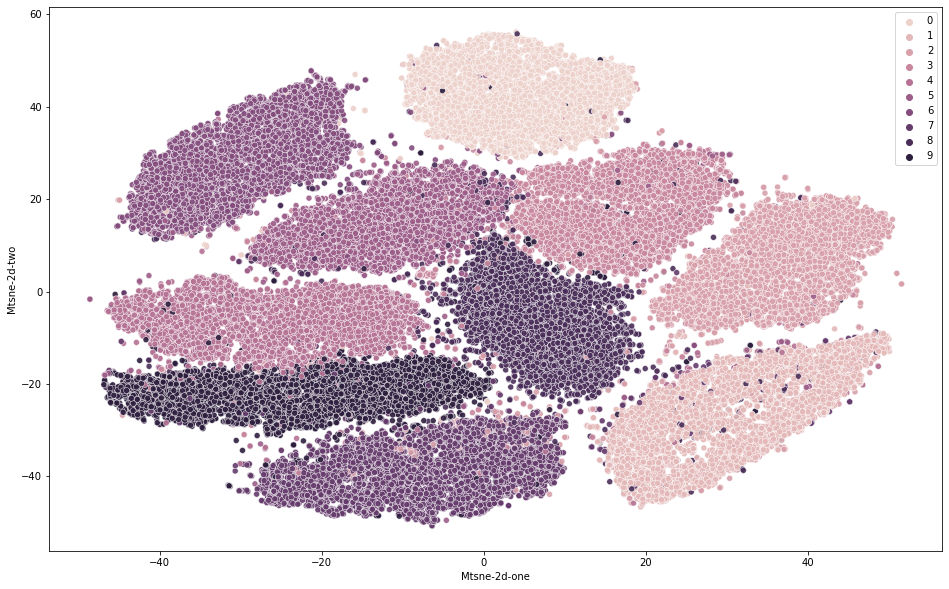

In [134]:
from keras.datasets import mnist

(xx_train, yy_train), (x_test, y_test) = mnist.load_data()

tsne_mnist = TSNE(n_iter=1000,perplexity=45).fit_transform(xx_train.reshape(60000,-1))

df_subset_mnist = pd.DataFrame(0, index=np.arange(len(xx_train)),columns=['Mtsne-2d-one','Mtsne-2d-two'])

df_subset_mnist['Mtsne-2d-one'] = tsne_mnist[:,0]
df_subset_mnist['Mtsne-2d-two'] = tsne_mnist[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="Mtsne-2d-one", y="Mtsne-2d-two",
    hue=yy_train,
#     cmap=plt.cm.get_cmap('Paired'),    
    data=df_subset_mnist,
    legend="full",
    alpha=0.9
)

In [ ]:
#hyperparameters:
# learning rate [10-1000]
# n_iter [>=250]
# n_components [2d,3d]

In [13]:
#even data/ odd data any relation?
#<50 digits

%whos

Variable            Type           Data/Info
--------------------------------------------
DataLoader          type           <class 'torch.utils.data.dataloader.DataLoader'>
ImageFolder         type           <class 'torchvision.datasets.folder.ImageFolder'>
TSNE                type           <class 'sklearn.manifold._t_sne.TSNE'>
X_train             ndarray        10000x1x64x64: 40960000 elems, type `float32`, 163840000 bytes (156.25 Mb)
data_transform      Compose        Compose(\n    Grayscale(n<...>els=1)\n    ToTensor()\n)
df_subset           DataFrame            dtsne-2d-one  dtsne<...>n[10000 rows x 2 columns]
dmnist_data         ImageFolder    Dataset ImageFolder\n    <...> ToTensor()\n           )
dmnist_dataloader   DataLoader     <torch.utils.data.dataloa<...>object at 0x7fa9c7cc43d0>
filepath            str            /Users/urgupta/Documents/<...>et_100/double_mnist/train
i                   int            49
images              Tensor         tensor([[[[0.,  ..., 0.],<...

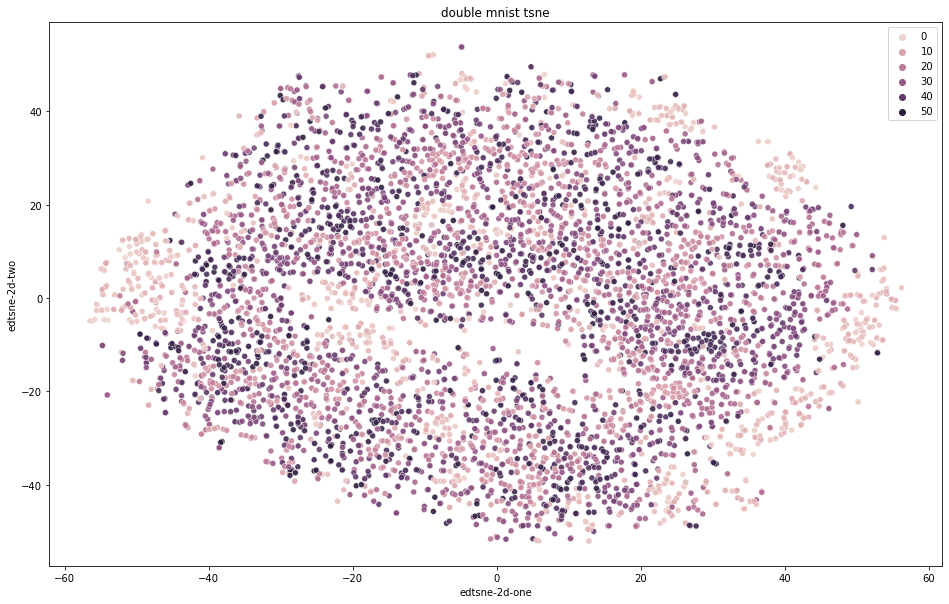

In [32]:
filepath = '/Users/urgupta/Documents/deepak/multimnist/MultiDigitMNIST/dataset_100/double_mnist/first_half_data/'

edmnist_data = torchvision.datasets.ImageFolder(root=filepath,
                           transform = data_transform)

# entire data loading
edmnist_dataloader = DataLoader(edmnist_data, batch_size=len(edmnist_data),shuffle=True)

edimages, edlabels = next(iter(edmnist_dataloader))

edX_train = edimages.numpy()
edy_train = edlabels.numpy()

edtsne = TSNE(perplexity=45).fit_transform(edX_train.reshape(5100,-1))

edf_subset = pd.DataFrame(0, index=np.arange(len(edmnist_data)),columns=['edtsne-2d-one','edtsne-2d-two'])

edf_subset['edtsne-2d-one'] = edtsne[:,0]
edf_subset['edtsne-2d-two'] = edtsne[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="edtsne-2d-one", y="edtsne-2d-two",
    hue=edy_train,
    data=edf_subset,
#     legend="full",
    alpha=0.9
)
plt.title('double mnist tsne')
plt.savefig("edmnist_45_first_half.png",bbox_inches='tight', dpi=150)

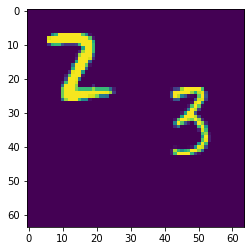

In [29]:
plt.imshow(edX_train[0][0])
plt.show()

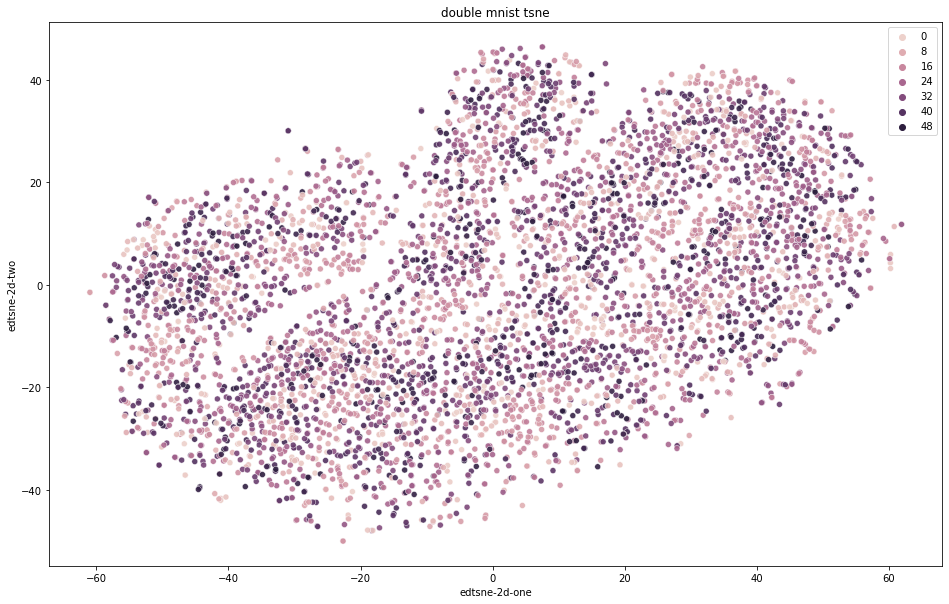

In [34]:
filepath = '/Users/urgupta/Documents/deepak/multimnist/MultiDigitMNIST/dataset_100/double_mnist/second_half_data/'

edmnist_data = torchvision.datasets.ImageFolder(root=filepath,
                           transform = data_transform)

# entire data loading
edmnist_dataloader = DataLoader(edmnist_data, batch_size=len(edmnist_data),shuffle=True)

edimages, edlabels = next(iter(edmnist_dataloader))

edX_train = edimages.numpy()
edy_train = edlabels.numpy()

edtsne = TSNE(perplexity=45).fit_transform(edX_train.reshape(4900,-1))

edf_subset = pd.DataFrame(0, index=np.arange(len(edmnist_data)),columns=['edtsne-2d-one','edtsne-2d-two'])

edf_subset['edtsne-2d-one'] = edtsne[:,0]
edf_subset['edtsne-2d-two'] = edtsne[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="edtsne-2d-one", y="edtsne-2d-two",
    hue=edy_train,
    data=edf_subset,
#     legend="full",
    alpha=0.9
)
plt.title('double mnist tsne')
plt.savefig("edmnist_45_second_half.png",bbox_inches='tight', dpi=150)

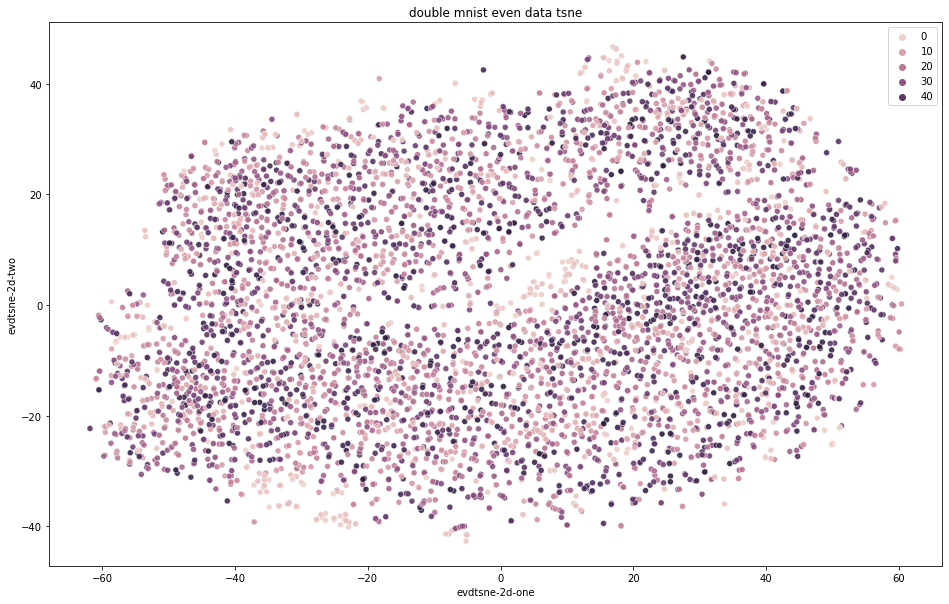

In [37]:
filepath = '/Users/urgupta/Documents/deepak/multimnist/MultiDigitMNIST/dataset_100/double_mnist/even_train/'

evendmnist_data = torchvision.datasets.ImageFolder(root=filepath,
                           transform = data_transform)

# entire data loading
evendmnist_dataloader = DataLoader(evendmnist_data, batch_size=len(evendmnist_data),shuffle=True)

evendimages, evendlabels = next(iter(evendmnist_dataloader))

evendX_train = evendimages.numpy()
evendy_train = evendlabels.numpy()

evendtsne = TSNE(perplexity=45).fit_transform(evendX_train.reshape(5000,-1))

evendf_subset = pd.DataFrame(0, index=np.arange(len(evendmnist_data)),columns=['evdtsne-2d-one','evdtsne-2d-two'])

evendf_subset['evdtsne-2d-one'] = evendtsne[:,0]
evendf_subset['evdtsne-2d-two'] = evendtsne[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="evdtsne-2d-one", y="evdtsne-2d-two",
    hue=evendy_train,
    data=evendf_subset,
#     legend="full",
    alpha=0.9
)
plt.title('double mnist even data tsne')
plt.savefig("edmnist_45_even.png",bbox_inches='tight', dpi=150)